# Evaluation A - 2025 : Arbres de décision et de régression en Python
A l’issue de l’évaluation, vous devez déposer le notebook, sous le nom **contAnomprenom.ipynb** dans **dépôt évaluation TP**

## **1. Les données**
*Source des données : Paulo Cortez, Université du Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez*  
Les données ont été légèrement modifiées (type) pour des raisons pédagogiques.

**Fichier : contA.csv**  
Ces données portent sur les résultats des élèves de l'enseignement secondaire de deux écoles portugaises. Les variables que nous avons retenues dans ce fichier :  
* **sexe** : sexe de l'élève (binaire : 'F' - femme ou 'M' - homme)
* **age** : âge de l'étudiant (numérique : de 15 à 22)
* **Medu** : niveau d'éducation de la mère (numérique : 0 - aucun, 1 - enseignement primaire, 2 – Collège, 3 – Lycée ou 4 – enseignement supérieur) 
* **tempstrajet** :  temps de trajet domicile-école en minutes
* **tempsetude** : temps d'étude hebdomadaire (numérique : 1 - <2 heures, 2 - 2 à 5 heures, 3 - 5 à 10 heures ou 4 - >10 heures)
* **redoublement** : nombre de redoublements antérieurs
* **courspart** : l’élève bénéficie de cours particuliers (binaire : oui ou non)
* **activites** : activités extrascolaires (binaire : oui ou non)
* **famrel** : qualité des relations familiales (numérique : de 1 - très mauvaise à 5 - excellente)
* **absences** : nombre d'absences scolaires (numérique : de 0 à 93)
* **note1** : note de première période (numérique : de 0 à 20) 
* **note2** : note de deuxième période (numérique : de 0 à 20) 
* **resultat** : validation du cours (validé ou pas validé)
* **ecole_origine** : école d'origine de l'élève (A, B ou C)
  
Nous allons, à partir de ces données, construire des arbres de décision/régression. 

# **Important !** 
Les variables **cibles** sont **note1**, **note2** et **resultat**.
Les variables **explicatives** sont les autres variables.  
Les variables **note1, note2** et **resultat** ne doivent pas être utilisées comme **variables explicatives**


## **2. Importation et préparation des données**

#### **Importation des librairies**

In [3]:
import numpy as np					#Pour la manipulation de tableaux
import pandas as pd					#Pour l’importation des données
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor	#Pour l’arbre
from sklearn.multioutput import MultiOutputClassifier	#Pour la séparation des données
import matplotlib.pyplot as plt     #Pour l’affichage de l’arbre
import os							#Pour le répertoire par défaut

#### **Modification du répertoire par défaut**

In [4]:
os.chdir(r'/run/media/maxime/DATA/IUT/R4.04/EvalA-20250314')

#### **Importation des données (à compléter)**

In [5]:
contA = pd.read_table('contA.csv', sep = ';', decimal = ',')

#### **Vérification - Contenu du dataframe employes**
* **head()** permet d'afficher les premières lignes (5 par défaut) du dataframe
* **dtypes** permet de lister les variables du dataframe avec leur type

In [6]:
contA.head()

,sexe,age,Medu,tempstrajet,ecole_ori,tempsetude,note1,note2,redoublement,courspart,activites,famrel,absences,resultat
0,F,18,4.0,18.0,A,2.0,5,6,0,yes,no,4,6,non validé
1,F,17,1.0,6.0,B,2.0,5,5,0,no,no,5,4,non validé
2,F,15,1.0,13.0,B,2.0,7,8,3,yes,no,4,10,validé
3,F,15,4.0,14.0,A,3.0,15,14,0,no,yes,3,2,validé
4,F,16,3.0,3.0,B,NaN,6,10,0,no,no,4,4,validé


In [7]:
contA.dtypes

sexe             object
age               int64
Medu            float64
tempstrajet     float64
ecole_ori        object
tempsetude      float64
note1             int64
note2             int64
redoublement      int64
courspart        object
activites        object
famrel            int64
absences          int64
resultat         object
dtype: object

#### **Variables catégorielles**
Nous définissons les variables **qualitatives** comme catégorielles (categorical)
**Attention** : une variable numérique peut être qualitative *(se référer à la description des données)*

In [8]:
categorical_cols = ['sexe', 'ecole_ori', 'courspart', 'activites', 'resultat']
for col in categorical_cols:
    contA[col] = contA[col].astype('category')


##### **Vérification**

In [9]:
contA.dtypes

sexe            category
age                int64
Medu             float64
tempstrajet      float64
ecole_ori       category
tempsetude       float64
note1              int64
note2              int64
redoublement       int64
courspart       category
activites       category
famrel             int64
absences           int64
resultat        category
dtype: object

## **3. Contraintes sur les données**
**Rappel** : pour faire un arbre en **Python**, avec la bibliothèque **scikit-learn** : 
* Les variables **explicatives** ne doivent pas avoir de **valeurs manquantes**
* Les variables **qualitatives explicatives** doivent être codées **numériquement**, qu'elles soient catégorielles ou non.

### **3.1. Première contrainte : suppression des valeurs manquantes sur les variables explicatives**


S’il y en a, une méthode classique est de les remplacer : on parle **d’imputation**.  
Cette imputation peut se faire par la **moyenne**, la **médiane**, la valeur **modale** (la plus fréquente)…

#### **Détection des valeurs manquantes**

In [10]:
contA.isna().sum()

sexe            1
age             0
Medu            1
tempstrajet     2
ecole_ori       0
tempsetude      1
note1           0
note2           0
redoublement    0
courspart       0
activites       0
famrel          0
absences        0
resultat        0
dtype: int64

#### **Imputations**

In [11]:
toImpute_num = ['Medu', 'tempstrajet', 'tempsetude']  # Variables numériques
toImpute_cat = ['sexe']  # Variables catégorielles

# Imputation des valeurs manquantes
for col in toImpute_num:
    contA[col] = contA[col].fillna(contA[col].median())

for col in toImpute_cat:
    contA[col] = contA[col].fillna(contA[col].mode()[0])


##### **Vérification**

In [12]:
contA.isna().sum()

sexe            0
age             0
Medu            0
tempstrajet     0
ecole_ori       0
tempsetude      0
note1           0
note2           0
redoublement    0
courspart       0
activites       0
famrel          0
absences        0
resultat        0
dtype: int64

### **3.2. Deuxième contrainte : les modalités des variables explicatives doivent être numériques**
Quelles sont les variables concernées ?
Pour répondre, nous pouvons afficher les premières lignes du dataframe ou faire une boucle sur les variables catégorielles, pour afficher leurs modalités. 

#### **Affichage des premières lignes du dataframe**

In [13]:
contA.head()

,sexe,age,Medu,tempstrajet,ecole_ori,tempsetude,note1,note2,redoublement,courspart,activites,famrel,absences,resultat
0,F,18,4.0,18.0,A,2.0,5,6,0,yes,no,4,6,non validé
1,F,17,1.0,6.0,B,2.0,5,5,0,no,no,5,4,non validé
2,F,15,1.0,13.0,B,2.0,7,8,3,yes,no,4,10,validé
3,F,15,4.0,14.0,A,3.0,15,14,0,no,yes,3,2,validé
4,F,16,3.0,3.0,B,2.0,6,10,0,no,no,4,4,validé


#### **Affichage des modalités des variables catégorielles**
**Rappel** : La méthode `unique()` permet d'afficher les modalités ou les valeurs d'une variable.   
Nous pouvons l'appliquer à chaque variable catégorielle du dataframe, pour savoir si elle contient des **modalités non numériques**.

In [14]:
for genre, cat in contA.dtypes.items():
    if cat == "category" :
        print("Modalités de ", genre, " : ",contA[genre].unique(), "\n")

Modalités de  sexe  :  ['F', 'M']
Categories (2, object): ['F', 'M'] 

Modalités de  ecole_ori  :  ['A', 'B', 'C']
Categories (3, object): ['A', 'B', 'C'] 

Modalités de  courspart  :  ['yes', 'no']
Categories (2, object): ['no', 'yes'] 

Modalités de  activites  :  ['no', 'yes']
Categories (2, object): ['no', 'yes'] 

Modalités de  resultat  :  ['non validé', 'validé']
Categories (2, object): ['non validé', 'validé'] 



#### **Recodage des modalités non numériques des variables catégorielles (qualitatives)**
Pour chaque variable concernée, il faudra créer un dictionnaire de correspondance pour recoder les modalités.
##### **Dictionnaire(s) de correspondances**

In [15]:
# Dictionnaires de correspondance
dico_sexe = {cat: i for i, cat in enumerate(contA['sexe'].cat.categories)}
dico_ecole_ori = {cat: i for i, cat in enumerate(contA['ecole_ori'].cat.categories)}
dico_courspart = {cat: i for i, cat in enumerate(contA['courspart'].cat.categories)}
dico_activites = {cat: i for i, cat in enumerate(contA['activites'].cat.categories)}
dico_resultat = {cat: i for i, cat in enumerate(contA['resultat'].cat.categories)}




##### **Recodage(s)**

In [16]:
# Recodage des variables catégorielles
contA['recodage_sexe'] = contA['sexe'].map(dico_sexe)
contA['recodage_ecole_ori'] = contA['ecole_ori'].map(dico_ecole_ori)
contA['recodage_courspart'] = contA['courspart'].map(dico_courspart)
contA['recodage_activites'] = contA['activites'].map(dico_activites)
contA['recodage_resultat'] = contA['resultat'].map(dico_resultat)


#### **Vérification par affichage des premières valeurs du dataframe**

In [17]:
contA.head()


,sexe,age,Medu,tempstrajet,ecole_ori,tempsetude,note1,note2,redoublement,courspart,activites,famrel,absences,resultat,recodage_sexe,recodage_ecole_ori,recodage_courspart,recodage_activites,recodage_resultat
0,F,18,4.0,18.0,A,2.0,5,6,0,yes,no,4,6,non validé,0,0,1,0,0
1,F,17,1.0,6.0,B,2.0,5,5,0,no,no,5,4,non validé,0,1,0,0,0
2,F,15,1.0,13.0,B,2.0,7,8,3,yes,no,4,10,validé,0,1,1,0,1
3,F,15,4.0,14.0,A,3.0,15,14,0,no,yes,3,2,validé,0,0,0,1,1
4,F,16,3.0,3.0,B,2.0,6,10,0,no,no,4,4,validé,0,1,0,0,1


## **5. Arbre de décision**

### **5.1 Définition de la cible et des variables explicatives**
Définir : 
* une Serie **cible**, contenant la variable cible du futur arbre de décision (on n'a pas trop le choix)
* un DataFrame **df_explic** ne contenant que les variables explicatives dont les noms seront stockés dans la liste **liste_explic**

In [18]:
cible = contA[['note1', 'note2', 'recodage_resultat']].copy()
print(list(contA.columns))

['sexe', 'age', 'Medu', 'tempstrajet', 'ecole_ori', 'tempsetude', 'note1', 'note2', 'redoublement', 'courspart', 'activites', 'famrel', 'absences', 'resultat', 'recodage_sexe', 'recodage_ecole_ori', 'recodage_courspart', 'recodage_activites', 'recodage_resultat']


In [36]:
# Création du tab des varaibles explicatives
explic = contA.loc[:,[ 'age', 'Medu', 'tempstrajet', 'tempsetude', 'redoublement', 'famrel', 'absences', 'recodage_sexe', 'recodage_ecole_ori', 'recodage_courspart', 'recodage_activites']]



#### **Paramétrage et calcul de l'arbre**

In [39]:
#Profondeur max : 3, taille minimum des feuilles : 5
class_arbre = MultiOutputClassifier(DecisionTreeClassifier(max_depth=5, min_samples_leaf=5))
tree = class_arbre.fit(explic, cible)

#Calcul des informations de l’arbre dans digit_free
digit_tree=tree.fit(explic, cible)

nomvar  = ['sexe', 'age', 'Medu', 'tempstrajet', 'ecole_ori', 'tempsetude', 'note1', 'note2', 'redoublement', 'courspart', 'activites', 'famrel', 'absences', 'resultat']

#### **Représentation graphique de l’arbre**

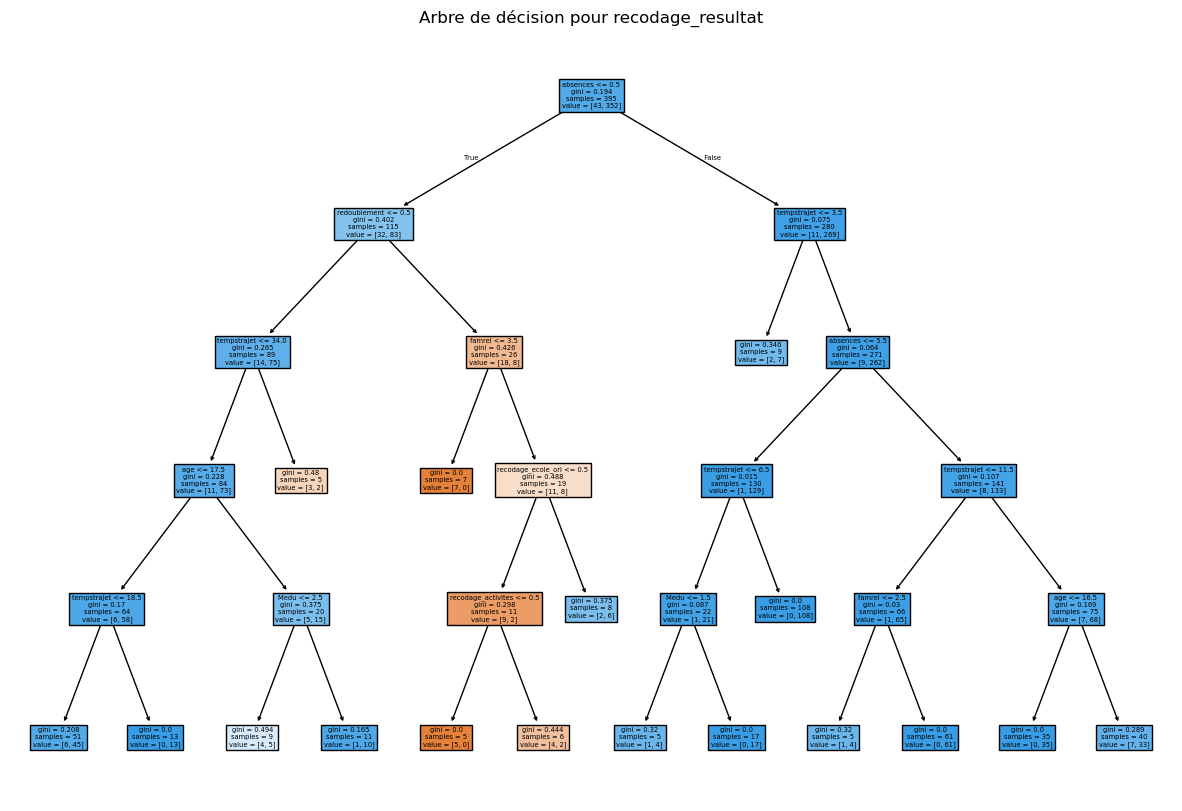

In [40]:
def plot_decision_tree(tree, feature_names, target_index, target_name):
    plt.figure(figsize=(15, 10))
    plot_tree(tree.estimators_[target_index], feature_names=feature_names, filled=True)
    plt.title(f"Arbre de décision pour {target_name}")
    plt.show()

# Afficher un arbre pour 'recodage_resultat'
plot_decision_tree(tree, explic.columns, target_index=2, target_name='recodage_resultat')


## **6. Attention aux variables qualitatives nominales !**
Dans l'arbre de décision ci-dessus, les variables qualitatives recodées sont systématiquement traitées sous forme **ordinale**.  
Ce qui n'est pas adapté aux variables **nominales**.   
Quelles sont la ou les variables concernées ?  
Utiliser la fonction **get_dummies** pour corriger le problème. 

In [25]:
contA_enconded = pd.get_dummies(contA, columns=['sexe', 'ecole_ori', 'courspart', 'activites', 'resultat'])

## **7. Nouvel arbre de décision**
#### **Variables cible et explicatives**

In [43]:
cible = contA_enconded[['note1', 'note2', 'recodage_resultat']].copy()
explicatives = contA_enconded.drop(columns=['note1', 'note2', 'recodage_resultat'])
contA_enconded.head()

,age,Medu,tempstrajet,tempsetude,note1,note2,redoublement,famrel,absences,recodage_sexe,...,sexe_M,ecole_ori_A,ecole_ori_B,ecole_ori_C,courspart_no,courspart_yes,activites_no,activites_yes,resultat_non validé,resultat_validé
0,18,4.0,18.0,2.0,5,6,0,4,6,0,...,False,True,False,False,False,True,True,False,True,False
1,17,1.0,6.0,2.0,5,5,0,5,4,0,...,False,False,True,False,True,False,True,False,True,False
2,15,1.0,13.0,2.0,7,8,3,4,10,0,...,False,False,True,False,False,True,True,False,False,True
3,15,4.0,14.0,3.0,15,14,0,3,2,0,...,False,True,False,False,True,False,False,True,False,True
4,16,3.0,3.0,2.0,6,10,0,4,4,0,...,False,False,True,False,True,False,True,False,False,True


#### **Paramétrage de l'arbre**

In [44]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
tree.fit(explicatives, cible)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

#### **Affichage de l'arbre**

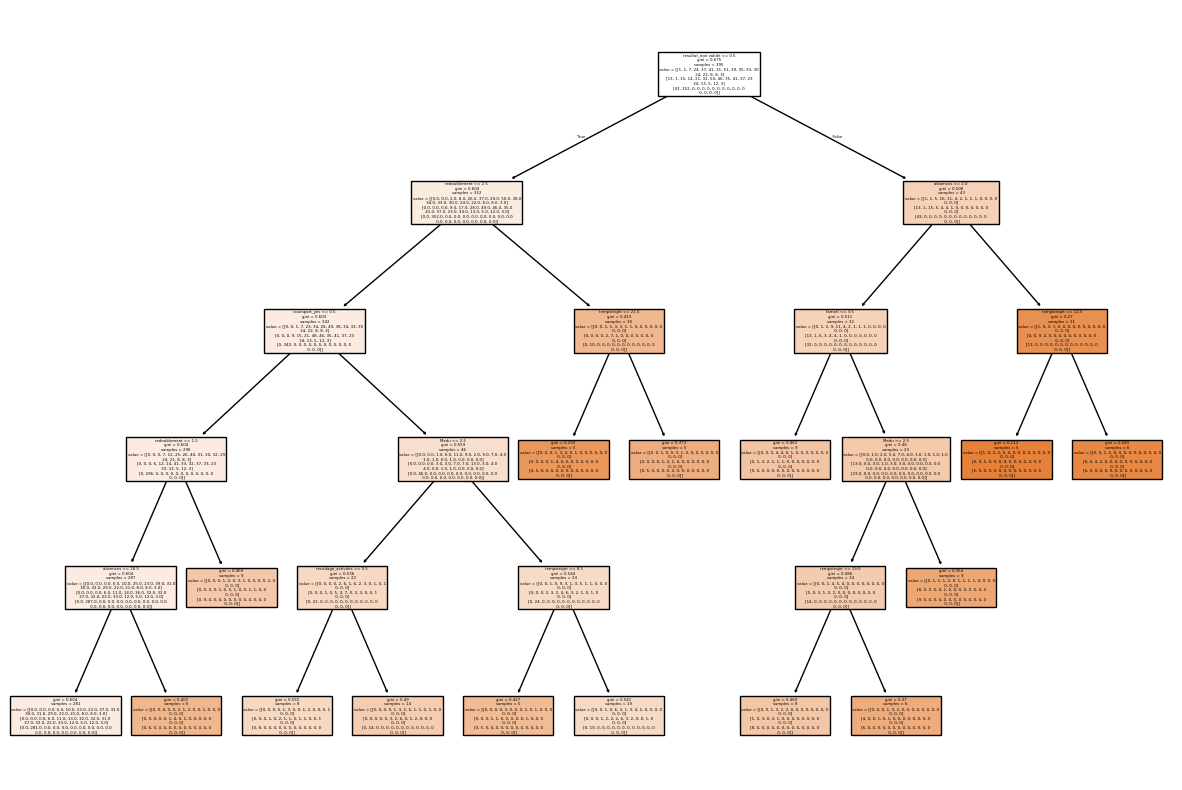

In [45]:
def plot_decision_tree(tree, feature_names):
    plt.figure(figsize=(15, 10))
    plot_tree(tree, feature_names=feature_names, class_names=['non validé', 'validé'], filled=True)
    plt.show()

plot_decision_tree(tree, explicatives.columns)


### **Vérifications** 
**À traiter éventuellement à la fin de l'évaluation, s'il vous reste du temps, après l'arbre de régression** (questions suivantes)  

En utilisant des **fonctions basiques**, vérifier les valeurs obtenues sur les trois premiers nœuds de l’arbre.   
#### **Exemples de fonctions basiques** 
* **value_counts()** pour obtenir un tableau de fréquence. **Poly p20**
*  **crosstab** pour un tableau de contingence. **Poly p23**

## **8. Arbres de régression** 
Choisir maintenant une variable **quantitative** cible parmi celles qui ont été désignées comme telles, dans la présentation des données.

In [84]:
cible = ...

### **8.1 Paramétrage et affichage de l'arbre de régression**

### **Vérifications** 

En utilisant des **fonctions basiques**, vérifier les valeurs obtenues sur les trois premiers nœuds de l’arbre.   
#### **Exemples de fonctions basiques (rappels)** : 
* **len** permet de déterminer le nombre d'individus d'un DataFrame ou d'une Serie
* **var()** et **var(ddof=0)**, appliquées à des Series, permettent de calculer les variances non biaisées et biaisées d'une variable *(la notion de biais n'a pas été vue en cours)*. **Poly p.18**
* **pd.cut()**, utilisées avec les options **bins =** et **labels =** permet de scinder la population en sous-population à partir des valeurs observées sur une variable quantitative. **Poly p.13**
* **groupby()** permet d'accéder aux sous-Series associées aux modalités d'une variable qualitative. Les méthodes **size(), mean(), var()**... peuvent ensuite être appliquées à ces sous-ensembles de données. **Poly p.24**
